In [40]:
from scipy.io import wavfile
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

# Variables
**Electromagnetic Strength:** Something Addison help me

**Damping:** Something Addison help me

**Spring Coefficient:** Something Addison help me

In [41]:
electromagnetic_strength = 10000
damping = -100*10
spring_coefficient = -0.01

In [42]:
# Read Sample File
samplerate, original = wavfile.read('./100hz.wav')
print("Total Data Length:", len(original), ", Sample Rate:",samplerate)

Total Data Length: 220500 , Sample Rate: 44100


<ipython-input-42-f99ce1d06fcc>:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, original = wavfile.read('./100hz.wav')


# Doing Our Adjustments

In [43]:
# Get maximum value of original (tells us how loud the original file is)
max_original = np.amax(np.absolute(original))

beg = 0
end = 100
# end = len(original)

original = original[beg:end]

# Set start time to beginning 
time = beg

In [44]:
first_integral_last_value = 0
second_integral_last_value = 0

adjusted = []
while time<end:
    electromagnetic_force = electromagnetic_strength * original[time] # ElectromagneticStrength * InputSignal
    
    first_integral = original[time] + first_integral_last_value # Integral(InputSignal)
    second_integral = first_integral + second_integral_last_value  # Integral(Integral(InputSignal))

    damped_signal = damping * first_integral # Damping * Integral(InputSignal)
    springed_signal = spring_coefficient * second_integral # SpringCoefficient * Integral(Integral(InputSignal))

    last_input_integral_1 = first_integral
    last_input_integral_2 = second_integral

    output = electromagnetic_force - (damped_signal + springed_signal)
    output = -1*(damped_signal + springed_signal)

    adjusted.append(output)

    time += 1

# Creating the Butter Filter
This uses `scipy.signal`

In [45]:
sos = signal.butter(10,20,"highpass",fs=samplerate, output="sos")

buttered_original = signal.sosfilt(sos, original)
buttered_adjusted = signal.sosfilt(sos, adjusted)

# Stabilizing Values
The new audio file often comes out on a very different scale than the original, so we set the maximum values equal to account for this

In [47]:
def normalize(values):
    max_values = np.amax(np.absolute(values))
    print("Scalar:", (max_original / max_values))
    normalized = (max_original / max_values) * values
    return normalized
    
# original = stabilize(original)
adjusted = normalize(adjusted)

Scalar: 0.0010129931320553634


TypeError: can't multiply sequence by non-int of type 'numpy.float64'

# Plotting New Values

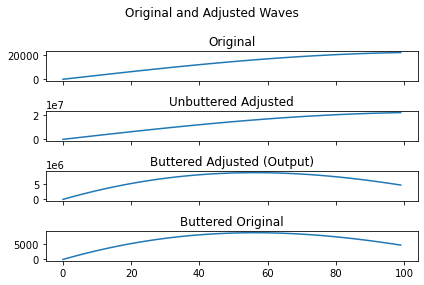

In [36]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True)
fig.suptitle('Original and Adjusted Waves')

ax1.plot(original)
ax1.set_title("Original")

ax2.plot(adjusted)
ax2.set_title("Unbuttered Adjusted")

ax3.plot(buttered_adjusted)
ax3.set_title("Buttered Adjusted (Output)")

ax4.plot(buttered_original)
ax4.set_title("Buttered Original")

plt.tight_layout()
plt.show()

# Saving the New File

In [48]:
wavfile.write("output.wav", samplerate, buttered_adjusted)